In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

In [11]:
# === Setup ===
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/PRECEFF_SPATIALAVG_CWP_FILTERED/'
models = ['ERA5', 'FV3', 'GEOS5', 'ICON', 'NICAM', 'HadGEM3', 'SAM']
sampling_freq = {'ERA5': 1, 'FV3': 4, 'GEOS5': 4, 'ICON': 4, 'NICAM': 4, 'HadGEM3': 4, 'SAM': 2}

thresholds = ['less1', '1']
labels = {'less1': r'$\dot{P} < 1$ mm hr$^{-1}$', '1': r'$\dot{P} > 1$ mm hr$^{-1}$'}

# === Container for normalized PSDs ===
psd_data = {'less1': {}, '1': {}}
frequencies = {}

# === Load and process data ===
for model in models:
    for threshold in thresholds:
        fname = f"{basedir}{model}_PRECEFF_{threshold}mm_hr_20160809-20160909_Asia_spatialavg.nc"
        da = xr.open_dataset(fname)['PRECEFF_SPATIALAVG']
        series = da.values
        series = series[~np.isnan(series)]

        # Welch PSD
        fs = sampling_freq[model]  # sampling frequency for this model
        f, Pxx = welch(series, fs=fs, window='hann', nperseg=512, noverlap=256, detrend='linear')

        # Normalize PSD
        Pxx_normalized = Pxx / np.trapz(Pxx, f)

        psd_data[threshold][model] = Pxx_normalized
        frequencies[model] = f * 24  # convert to cycles/day


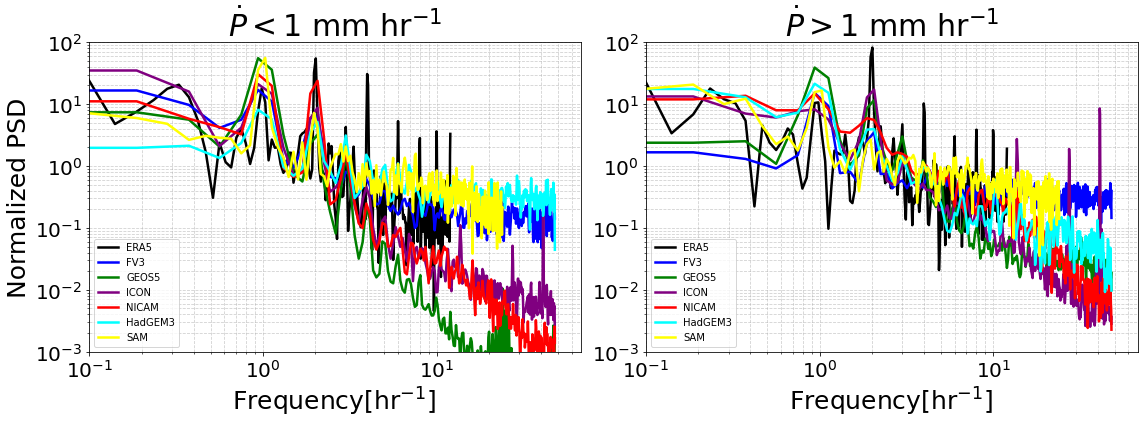

In [12]:
# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'yellow']

for i, threshold in enumerate(thresholds):
    ax = axes[i]
    for model, color in zip(models, colors):
        ax.loglog(frequencies[model], psd_data[threshold][model], label=model, color=color, linewidth=2.5)

    ax.set_xlabel("Frequency[hr$^{-1}$] ", fontsize=25)
    if i == 0:
        ax.set_ylabel("Normalized PSD", fontsize=25)
    ax.set_title(labels[threshold], fontsize=30)
    ax.grid(True, which='both', linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlim(1e-1,)
    ax.set_ylim(1e-3, 1e2)
    ax.legend(fontsize=10, loc='lower left')

plt.tight_layout()
# plt.savefig('Figure_PSD_Normalized.png', dpi=300, bbox_inches='tight')
plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_10_Power_Density_Spectrum_daily.png', dpi=200, bbox_inches='tight')
plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_10_Power_Density_Spectrum_daily.pdf', format='pdf', dpi=200, bbox_inches='tight')
